In [2]:

import numpy as np

from DataAnalysisClass import *
from clustering_work import *

single = ['aug-cc-pVDZ', 'aug-cc-pVTZ', 'aug-cc-pVQZ', 'aug-cc-pV5Z', 'aug-cc-pV6Z']
single_polarized = ['aug-cc-pCVDZ', 'aug-cc-pCVTZ', 'aug-cc-pCVQZ']
double = ['d-aug-cc-pVDZ', 'd-aug-cc-pVTZ', 'd-aug-cc-pVQZ', 'd-aug-cc-pV5Z', 'd-aug-cc-pV6Z']
double_polarized = ['d-aug-cc-pCVDZ', 'd-aug-cc-pCVTZ', 'd-aug-cc-pCVQZ']
all_basis_sets = single + single_polarized + double + double_polarized


In [3]:

database_path = Path('/home/ahurta92/data/august')
paper_path = Path('response_paper_figures')



In [4]:
import glob

# glob for .mol files in august molecules directory
mols = glob.glob('/home/ahurta92/data/august/molecules/*.mol')
mols = [mol.split('/')[-1].split('.')[0] for mol in mols]
mols.remove('LiH_s')


In [5]:
class MRAComparedBasisDF(pd.DataFrame):
    def __init__(self, polar_data, index, values: list, PercentError: bool, *args, **kwargs):
        # Use the special_parameter to modify the DataFrame or perform additional initialization
        basis_data = polar_data.query('basis!="MRA"').copy()
        basis_data = basis_data.set_index(index)

        for value in values:
            basis_data[f'{value}MRA'] = polar_data.query('basis=="MRA"').set_index(index)[
                value]
            if PercentError:
                basis_data[f'{value}E'] = ((basis_data[value] - basis_data[f'{value}MRA']) / basis_data[f'{value}MRA'] * 100)
            else:
                basis_data[f'{value}E'] = (basis_data[value] - basis_data[f'{value}MRA'])
        basis_data = basis_data.reset_index()
        # create a column of percent error in alpha
        basis_data = make_detailed_df(basis_data)
        super().__init__(basis_data, *args, **kwargs)




In [6]:
august_database = PolarizabilityData(mols, 'hf', 'dipole', all_basis_sets, database_path, overwrite=False)


energy_df
Could not initialize energy_df
energy_diff_df
Could not initialize energy_diff_df
polar_data
Could not initialize polar_data
alpha_eigen
Could not initialize alpha_eigen
eigen_diff
cannot handle a non-unique multi-index!
Could not initialize eigen_diff
iso_data
Could not initialize iso_data


In [7]:
august_database.save_dfs()

'NoneType' object has no attribute 'copy'
Could not save eigen_diff


In [8]:
basis_data = MRAComparedBasisDF(august_database.iso_data.copy(), ['molecule', 'omega'], ['alpha', 'gamma'], True)
basis_data

['D', 'T', 'Q', '5', '6']


,molecule,omega,basis,alpha,gamma,alphaMRA,alphaE,gammaMRA,gammaE,augmentation,polarization,mol_system,valence,Type
0,NH2Cl,0,aug-cc-pVDZ,24.800048,12.340561,25.978063,-4.534652,11.913106,3.588107,aug,V,Second-row,D,aug-cc-pVnZ
1,NH2Cl,1,aug-cc-pVDZ,24.814924,12.356587,25.994977,-4.539541,11.928273,3.590745,aug,V,Second-row,D,aug-cc-pVnZ
2,NH2Cl,2,aug-cc-pVDZ,24.859753,12.404995,26.045737,-4.553467,11.973083,3.607364,aug,V,Second-row,D,aug-cc-pVnZ
3,NH2Cl,3,aug-cc-pVDZ,24.935151,12.486799,26.131067,-4.576603,12.048642,3.636568,aug,V,Second-row,D,aug-cc-pVnZ
4,NH2Cl,4,aug-cc-pVDZ,25.042193,12.603777,26.252403,-4.609904,12.156879,3.676094,aug,V,Second-row,D,aug-cc-pVnZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12811,HOOH,4,d-aug-cc-pV6Z,14.557781,9.197190,14.562407,-0.031763,9.209097,-0.129296,d-aug,V,First-row,6,d-aug-cc-pVnZ
12812,HOOH,5,d-aug-cc-pV6Z,14.637270,9.301981,14.642040,-0.032579,9.314205,-0.131249,d-aug,V,First-row,6,d-aug-cc-pVnZ
12813,HOOH,6,d-aug-cc-pV6Z,14.736426,9.433393,14.741137,-0.031954,9.445753,-0.130859,d-aug,V,First-row,6,d-aug-cc-pVnZ
12814,HOOH,7,d-aug-cc-pV6Z,14.856592,9.593652,14.861393,-0.032309,9.606048,-0.129052,d-aug,V,First-row,6,d-aug-cc-pVnZ


In [36]:
mra_data=august_database.iso_data.query('basis=="MRA"').copy()

In [9]:
import seaborn as sns


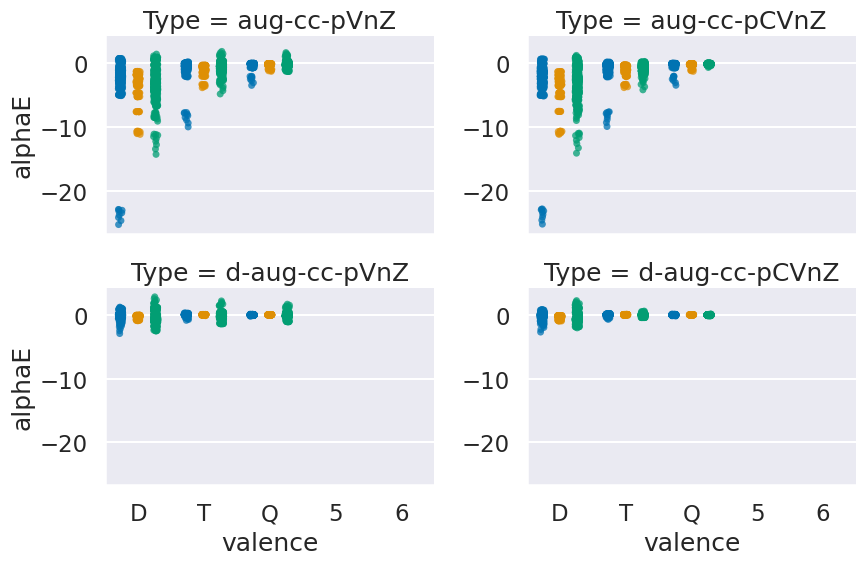

In [10]:
sharey=False,

subset_mols=['NaH','H2O','HF','CH3SH','Ne','Ar']
vlevel=['D','T','Q']


pdata=basis_data.query('molecule.isin(@mols) and valence.isin(@vlevel)')
g = sns.FacetGrid(data=pdata, col='Type',col_wrap=2,  sharey=sharey, sharex=True, height=3, aspect=1.5)
g.map_dataframe(sns.stripplot,x='valence',y='alphaE', hue='mol_system', size=5, alpha=.75, palette='colorblind',dodge=True,
      legend=True)



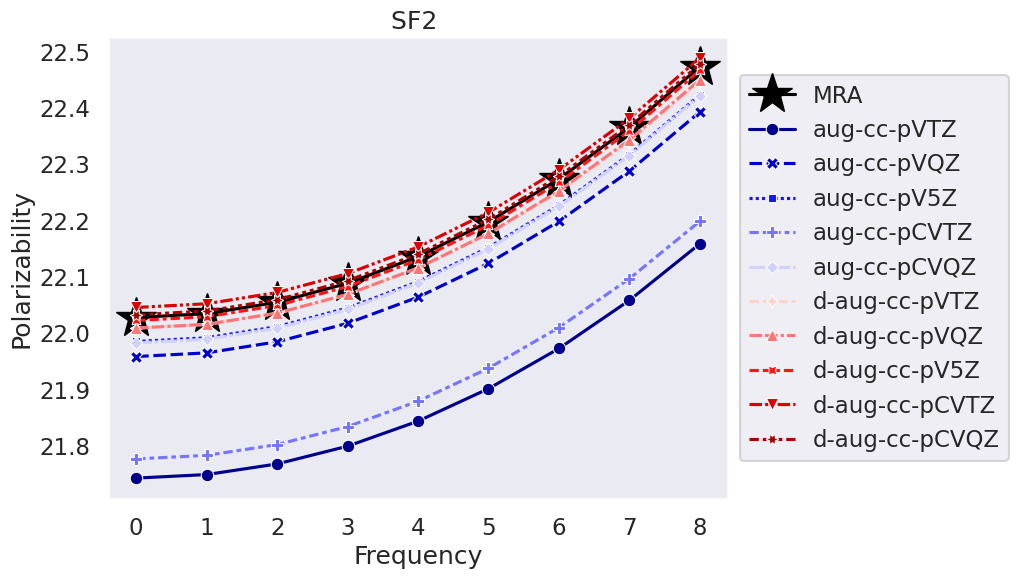

In [78]:
sns.set_style('dark')
subset_mols=['SF2']
vlevel = ['T','Q','5']
plot_data = basis_data.query('valence.isin(@vlevel) and molecule.isin(@subset_mols)' ).copy()
# remove unused categories from valence
plot_data.valence = plot_data.valence.cat.remove_unused_categories()
mra_plot_data = mra_data.query('molecule.isin(@subset_mols)').copy()

# create a figure with ax
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

#sns.lineplot(data=mra_plot_data, x='omega', y='alpha',  markers=True, ax=ax, palette=['k'],size=30, legend=False)
# make a plotlib lineplot
import matplotlib.pyplot as plt
plt.plot(mra_plot_data.omega, mra_plot_data.alpha, marker='*', color='k', label='MRA', markersize=30)


# create a lineplot
pal=sns.cubehelix_palette(start=.5, rot=-.75)
pal='seismic'

sns.lineplot(data=plot_data, x='omega', y='alpha', style='basis',hue='basis', markers=True, ax=ax,palette=pal,legend='brief')
# rotate xlabels
# set the title
ax.set_title('{} '.format(subset_mols[0]))
# set the ylabel
ax.set_ylabel('Polarizability')
# set the xlabel
ax.set_xlabel('Frequency')
# move the legend to the right off the plot
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# add mra line




/tmp/ipykernel_30968/450048983.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(basis_labels)


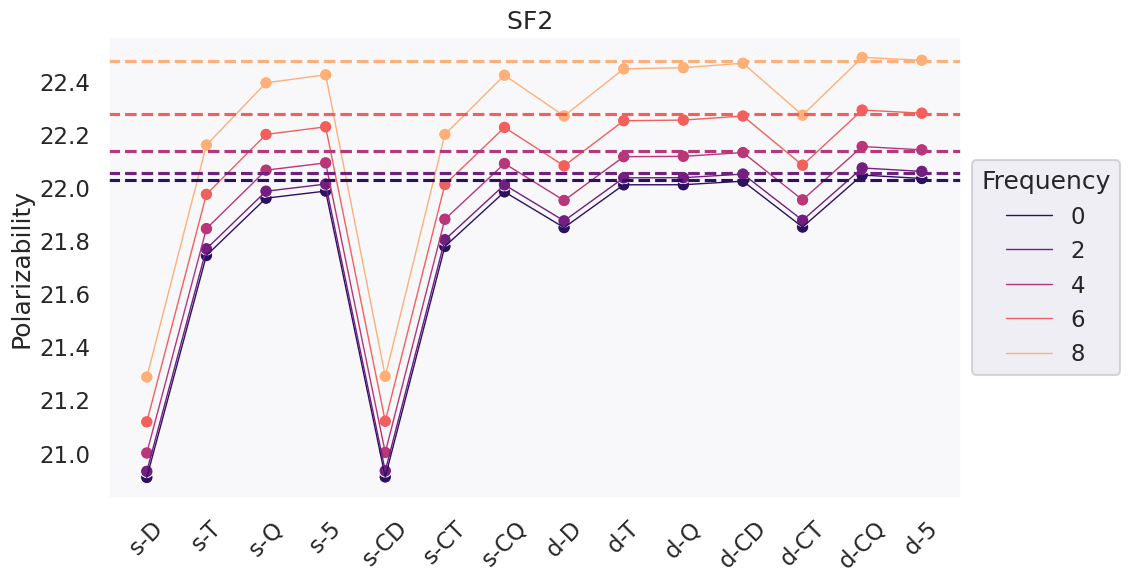

In [128]:
sns.set_style('dark')
subset_mols=['SF2']
vlevel = ['D','T','Q','5']
basis_labels=['s-D','s-T','s-Q','s-5','s-CD','s-CT','s-CQ','d-D','d-T','d-Q','d-CD','d-CT','d-CQ','d-5']
omegas=[0,2,4,6,8]
plot_data = basis_data.query('valence.isin(@vlevel) and molecule.isin(@subset_mols) and omega.isin(@omegas)' ).copy()
# remove unused categories from valence
plot_data.valence = plot_data.valence.cat.remove_unused_categories()
plot_data.omega=plot_data.omega.astype('category')
plot_data.omega = plot_data.omega.cat.remove_unused_categories()
mra_plot_data = mra_data.query('molecule.isin(@subset_mols) and omega.isin(@omegas)').copy()

# create a figure with ax
fig, ax = plt.subplots(1, 1, figsize=(11, 6))

#sns.lineplot(data=mra_plot_data, x='omega', y='alpha',  markers=True, ax=ax, palette=['k'],size=30, legend=False)
# make a plotlib lineplot
import matplotlib.pyplot as plt
pal='magma'

# create a plot of basis vs alpha
sns.lineplot(data=plot_data, x='basis', y='alpha', markers=True, ax=ax,legend='brief',hue='omega',palette=pal,linewidth=1)
sns.scatterplot(data=plot_data, x='basis', y='alpha', ax=ax, hue='omega',palette=pal,legend=False)
# rotate xlabels
plt.xticks(rotation=45)

# move the legend to the right off the plot
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Frequency')

# replace the xticks with basis labels
ax.set_xticklabels(basis_labels)

# set the title
ax.set_title('{} '.format(subset_mols[0]))
# set the ylabel
ax.set_ylabel('Polarizability')
# set the xlabel
ax.set_xlabel('')


mra_colors=sns.color_palette(pal, n_colors=len(omegas))

for i,om in enumerate(omegas):
    mra_om=mra_plot_data.query('omega==@om')
    plt.axhline(mra_om.alpha.iloc[0], color=mra_colors[i], linestyle='--', label='MRA')

# make background face lighter 
#ax.set_facecolor('grey')

# change the alpha of the background face
ax.patch.set_alpha(0.3)




22.02733333333333

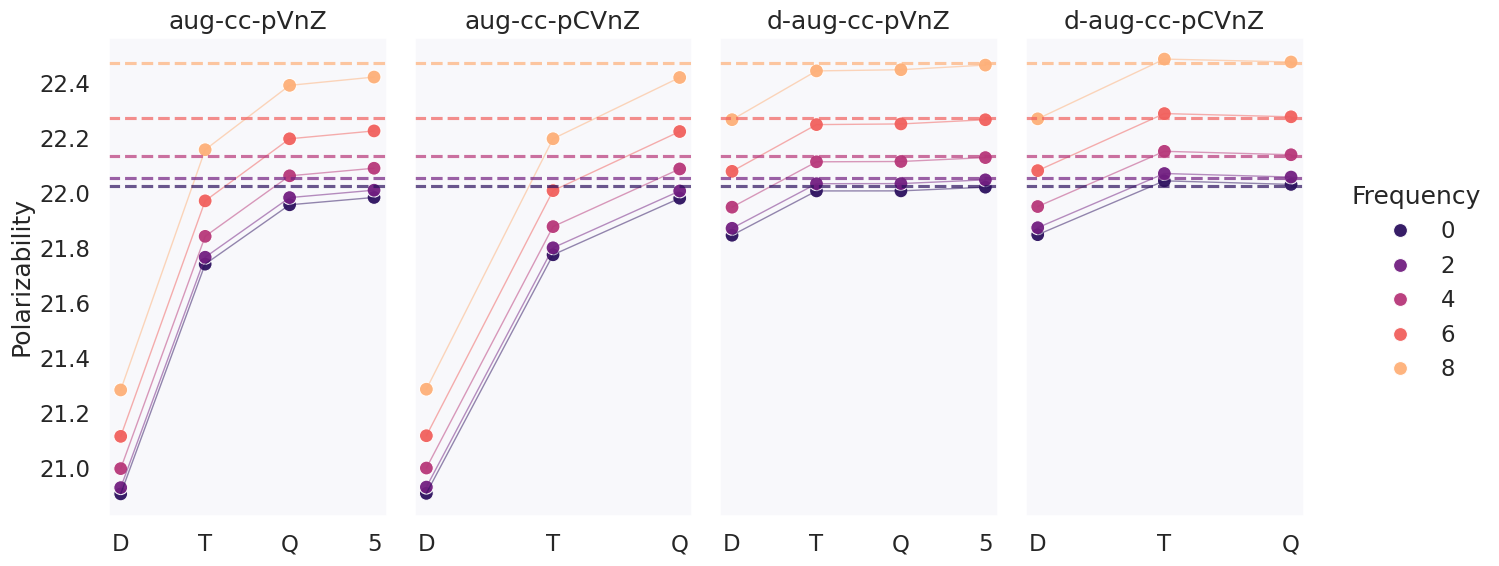

In [240]:

sns.set_context('talk')
sns.set_style('dark')
subset_mols=['SF2']
vlevel = ['D','T','Q','5']
basis_labels=['s-D','s-T','s-Q','s-5','s-CD','s-CT','s-CQ','d-D','d-T','d-Q','d-CD','d-CT','d-CQ','d-5']
omegas=[0,2,4,6,8]
plot_data = basis_data.query('valence.isin(@vlevel) and molecule.isin(@subset_mols) and omega.isin(@omegas)' ).copy()
# remove unused categories from valence
plot_data.valence = plot_data.valence.cat.remove_unused_categories()
plot_data.omega=plot_data.omega.astype('category')
plot_data.omega = plot_data.omega.cat.remove_unused_categories()
mra_plot_data = mra_data.query('molecule.isin(@subset_mols) and omega.isin(@omegas)').copy()

pal='magma'
# make a facet grid version with seaborn 
g = sns.FacetGrid(data=plot_data, col='Type', sharey=True, sharex=False, height=6,aspect=.5, despine=False)
g.map_dataframe(sns.lineplot, x='valence', y='alpha', hue='omega',  alpha=.5, palette=pal,lw=1,
                legend=True)
g.map_dataframe(sns.scatterplot, x='valence', y='alpha', hue='omega',  alpha=.95, palette=pal,s=100 )
# set the titles
g.set_titles('{col_name}')
# set the ylabels
g.set_ylabels('Polarizability')
# set the xlabels
g.set_xlabels('')




# for each axis in the facet grid add MRA lines 
mra_colors=sns.color_palette(pal, n_colors=len(omegas))
for ax in g.axes.flat:
    for i,om in enumerate(omegas):
        mra_om=mra_plot_data.query('omega==@om')
        ax.axhline(mra_om.alpha.iloc[0], color=mra_colors[i], linestyle='--', label='MRA',alpha=.7)
    ax.patch.set_alpha(0.3)

g.add_legend(title='Frequency', loc='center left', bbox_to_anchor=(1, 0.5))

g.figure.tight_layout()







In [223]:
paper_path=Path('response_paper_figures')



In [227]:
g.savefig(paper_path / 'toc_figure1.png',transparent=False,dpi=1000)

In [239]:

g.savefig(paper_path / 'toc_figure1.svg',transparent=False)
